## Load data

## Basic stacked area chart


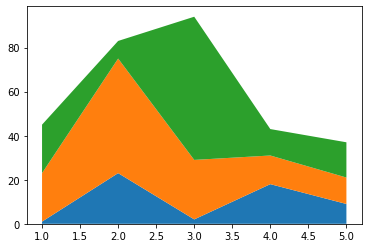

In [141]:
# library
import numpy as np
import matplotlib.pyplot as plt

# Create data
x=range(1,6)
y1=[1,23,2,18,9]
y2=[22,52,27,13,12]
y3=[22,8,65,12,16]

# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])

## Change the baseline parameter

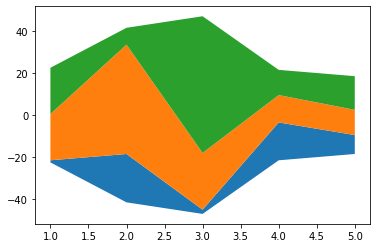

In [142]:

# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3, labels=['A','B','C'], baseline='sym')

## Let's get smooth with `interp1d`

In [143]:
from scipy.interpolate import make_interp_spline

In [144]:
tnew = np.linspace(1, 5, num=100, endpoint=True)
f = make_interp_spline(x, y1, k=2)
y1Smooth = f(tnew)

f = make_interp_spline(x, y2, k=2)
y2Smooth = f(tnew)

f = make_interp_spline(x, y3, k=2)
y3Smooth = f(tnew)



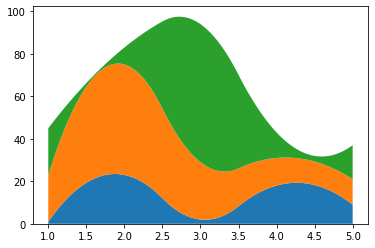

In [145]:
plt.stackplot(tnew, y1Smooth, y2Smooth, y3Smooth, labels=['A','B','C'], baseline='zero')

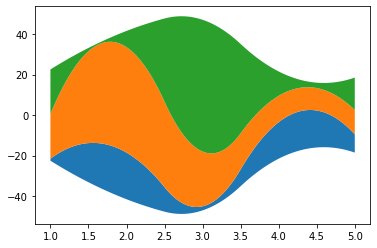

In [146]:
plt.stackplot(tnew, y1Smooth, y2Smooth, y3Smooth, labels=['A','B','C'], baseline='sym')

## Make it pretty

- Change colors
- add labels at the right place manually